Importing Libraries

In [54]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

C:\Users\hasde\AppData\Local\Temp\ipykernel_20108\2509225374.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(yf.tickers, period='12mo')
[*********************100%***********************]  1 of 1 completed



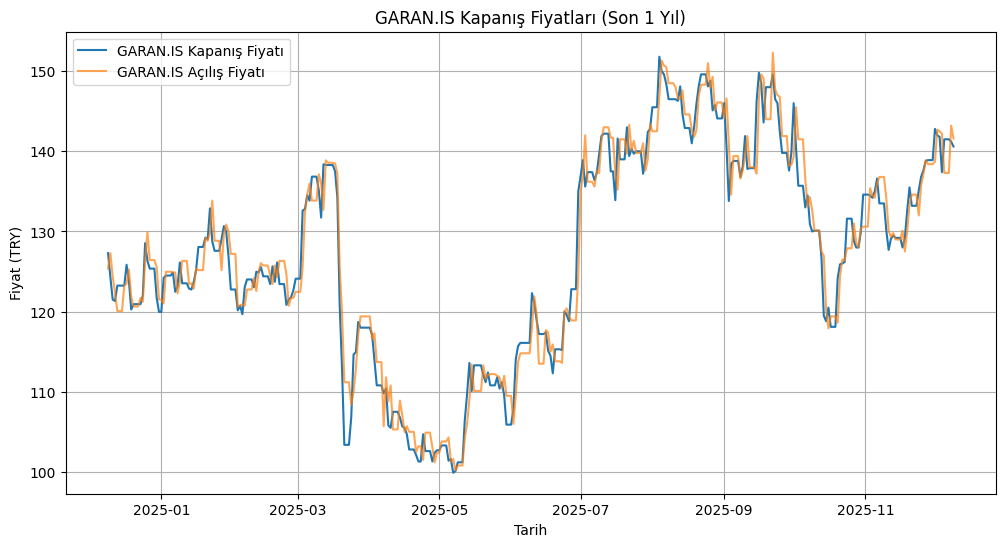

In [ ]:
# Define the list of tickers to download
yf.tickers = ["GARAN.IS"]
data = yf.download(yf.tickers, period='12mo')


# ADIM 1: Tüm takvim günlerini oluştur
date_range = pd.date_range(start=data.index.min(), end=data.index.max(), freq='D')

# ADIM 2: Boş günleri ekle (reindex)
data_full = data.reindex(date_range)

# ADIM 3: Forward Fill ile doldur
data_clean_ffill = data_full.ffill()


data = data_clean_ffill

#plot of the closing prices
plt.figure(figsize=(12,6))
plt.plot(data.index, data['Close'], label='GARAN.IS Kapanış Fiyatı')
plt.plot(data.index, data['Open'], label='GARAN.IS Açılış Fiyatı', alpha=0.7)
plt.title('GARAN.IS Açılış - Kapanış Fiyatları (Son 1 Yıl)')
plt.xlabel('Tarih')
plt.ylabel('Fiyat (TRY)')
plt.legend()
plt.grid()
plt.show()

# Calculate Log Returns and Daily Returns
data['Log_Returns'] = np.log(data['Close'] / data['Close'].shift(1))
data['Daily_Returns'] = data['Close'].pct_change()


# Save to CSV
data.to_csv('GARAN_1Y.csv')